### PCA（主成分分析）

PCA是在数据集中找到“主成分”或最大方差方向的线性变换，它可以用于降维。

#### 优点
1.对数据进行降维处理后，可以对“主元”向量的重要性进行排序，根据需要取前面最重要的部分，将后面的维数省去，可以达到降维从而简化模型或是对数据进行压缩的效果。同时最大程度的保持了原有数据的信息。

2.计算过程中完全不需要人为的设定参数或是根据任何经验模型对计算进行干预，最后的结果只与数据相关

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [18]:
data = loadmat('./datasets/ex7data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

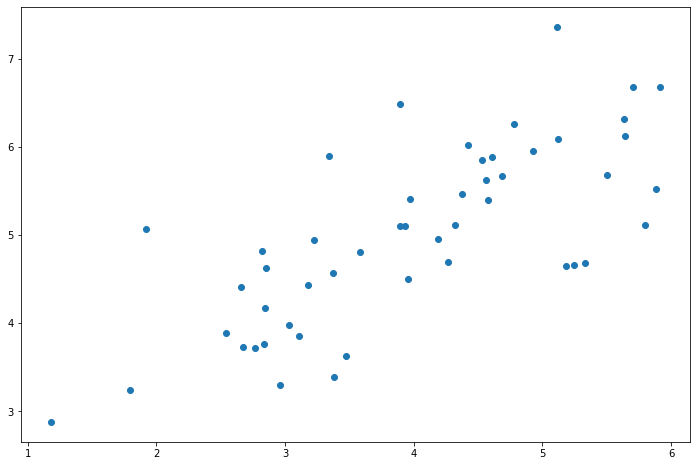

In [19]:
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

In [20]:
def pca(X):
    
    # 均值归一化
    X = (X - X.mean()) / X.std()
    
    # 计算协方差矩阵
    X = np.matrix(X)
    print(X.shape)
    cov = (X.T * X) / X.shape[0]
    print(cov.shape)
    
    # 计算协方差矩阵的特征向量，通过对原始数据的协方差矩阵的奇异值分解求得
    # U为主成分矩阵 n*n维
    U, S, V = np.linalg.svd(cov)
    print(U.shape, S.shape, V.shape)
    
    return U, S, V

In [21]:
U, S, V = pca(X)
U, S, V

(50, 2)
(2, 2)
(2, 2) (2,) (2, 2)


(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [22]:
# 数据从n维降至k维，我们只需要从U中选取前k个向量，获得一个n×k维度的矩阵
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [23]:
# 求新特征向量z
Z = project_data(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [24]:
# 反向转换步骤来恢复原始数据
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [25]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

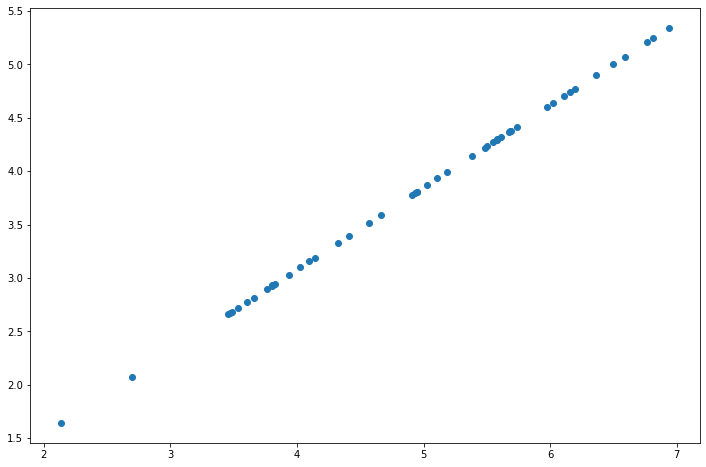

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

#### PCA应用于脸部图像

In [27]:
faces = loadmat('./datasets/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [28]:
# def plot_n_image(X, n):
    
#     pic_size = int(np.sqrt(X.shape[1]))
#     grid_size = int(np.sqrt(n))
    
#     first_n_images = X[:n, :]
    
#     fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
#                                     sharey=True, sharex=True, figsize=(8, 8))
    
#     for r in range(grid_size):
#         for c in range(grid_size):
#             ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
#             plt.xticks(np.array([]))
#             plt.yticks(np.array([]))

In [29]:
X[3,:]

array([-84.86631387, -64.86631387, -47.86631387, ..., -56.86631387,
       -57.86631387, -53.86631387])

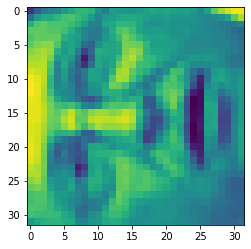

In [30]:
face = np.reshape(X[3,:], (32, 32))
plt.imshow(face)
plt.show()

In [31]:
# 提取前100个主要特征
U, S, V = pca(X)
Z = project_data(X, U, 100)

(5000, 1024)
(1024, 1024)
(1024, 1024) (1024,) (1024, 1024)


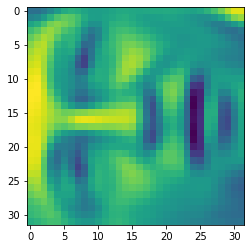

In [32]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)
plt.show()